### Building a model for predicting Price of Toyota--

Importing of packages--

In [1]:
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

Read the data file--

In [2]:
def read_data():
    data=pd.read_csv("C:/top mentor data sci assignmets/14 may/ToyotaCorolla.csv",encoding='latin1')
    return data
print("Calling the read_data function--")
data=read_data()
print(data.head())
data.columns

Calling the read_data function--
   Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

Renaming columns--

In [3]:
data=data.rename({"Age_08_04":"Age","KM":'Km',"HP":"Hp","Quarterly_Tax":"Qt",'Met_Color':"Metallic"},axis=1)
print(data.head(5))

   Id                                           Model  Price  Age  Mfg_Month  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   23         10   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   23         10   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   24          9   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   26          7   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   30          3   

   Mfg_Year     Km Fuel_Type  Hp  Metallic  ... Central_Lock  Powered_Windows  \
0      2002  46986    Diesel  90         1  ...            1                1   
1      2002  72937    Diesel  90         1  ...            1                0   
2      2002  41711    Diesel  90         1  ...            0                0   
3      2002  48000    Diesel  90         0  ...            0                0   
4      2002  38500    Diesel  90         0  ...            1                1   

   Power_Steering  Radio  Mistla

In [4]:
df=data[["Price","Age","Km","Hp","cc",'Doors','Gears', 'Qt', 'Weight','Metallic',"Automatic"]]
df.head()

,Price,Age,Km,Hp,cc,Doors,Gears,Qt,Weight,Metallic,Automatic
0,13500,23,46986,90,2000,3,5,210,1165,1,0
1,13750,23,72937,90,2000,3,5,210,1165,1,0
2,13950,24,41711,90,2000,3,5,210,1165,1,0
3,14950,26,48000,90,2000,3,5,210,1165,0,0
4,13750,30,38500,90,2000,3,5,210,1170,0,0


Checking for missing values--

Price        0
Age          0
Km           0
Hp           0
cc           0
Doors        0
Gears        0
Qt           0
Weight       0
Metallic     0
Automatic    0
dtype: int64


<AxesSubplot:>

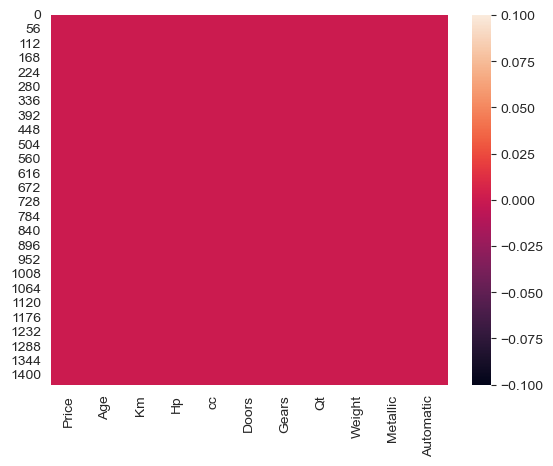

In [5]:
print(df.isnull().sum())
sns.heatmap(df.isnull())

Print basic info about data--

In [6]:
print(df.columns)
print("==========================")
print("Data types---")
print(df.dtypes)
print("==========================")
print("Number of gear positions--",df['Gears'].unique())
print("Number of doors--",df['Doors'].unique())

Index(['Price', 'Age', 'Km', 'Hp', 'cc', 'Doors', 'Gears', 'Qt', 'Weight',
       'Metallic', 'Automatic'],
      dtype='object')
Data types---
Price        int64
Age          int64
Km           int64
Hp           int64
cc           int64
Doors        int64
Gears        int64
Qt           int64
Weight       int64
Metallic     int64
Automatic    int64
dtype: object
Number of gear positions-- [5 6 3 4]
Number of doors-- [3 5 4 2]


#### Exploratory Data Analysis --

Checking for outliers--

<AxesSubplot:>

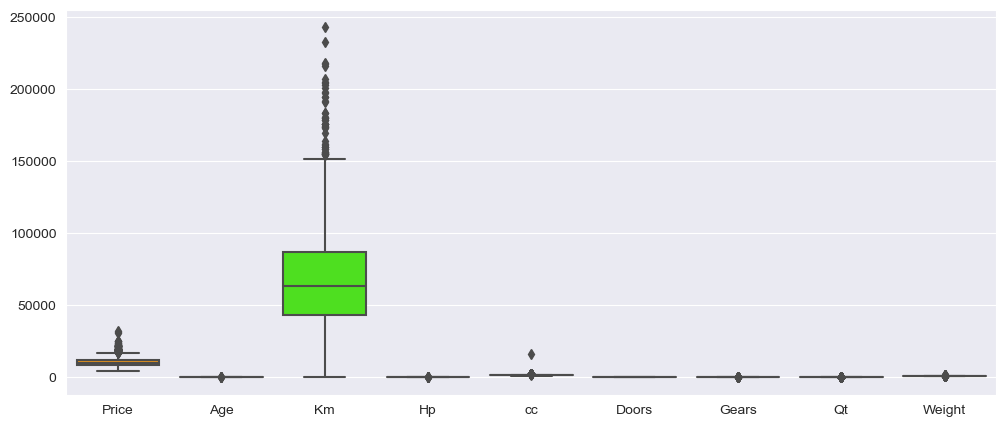

In [7]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df.loc[:, ['Price', 'Age', 'Km', 'Hp', 'cc', 'Doors', 'Gears', 'Qt', 'Weight']],palette="hsv")

'Prices','Accumulated KM's','Cylinder volume in cm3' will vary for different car models, hence this mentioned columns are showing outliers.

1.7038849799952995


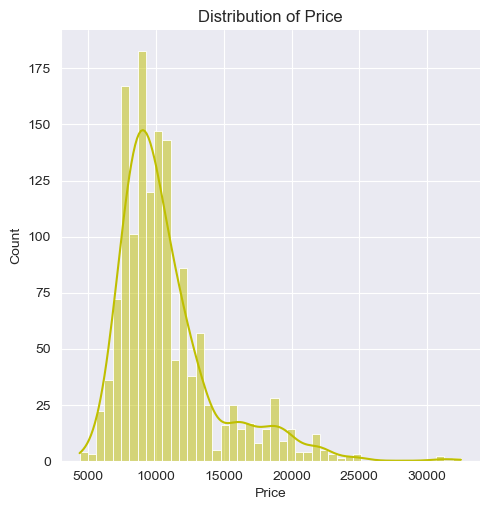

In [8]:
sns.displot(x=df["Price"],color="y",kde=True)
plt.title("Distribution of Price")
print(df["Price"].skew())

Price is positively skewed.

-0.82670187309842


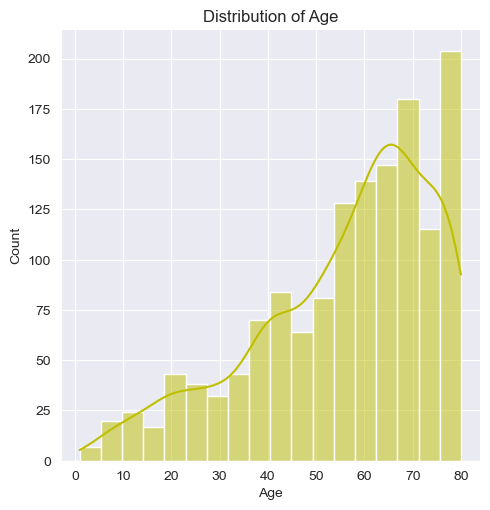

In [9]:
sns.displot(x=df["Age"],color="y",kde=True)
plt.title("Distribution of Age")
print(df["Age"].skew())

Age is negatively skewed.

Text(0.5, 1.0, 'Age v/s Price')

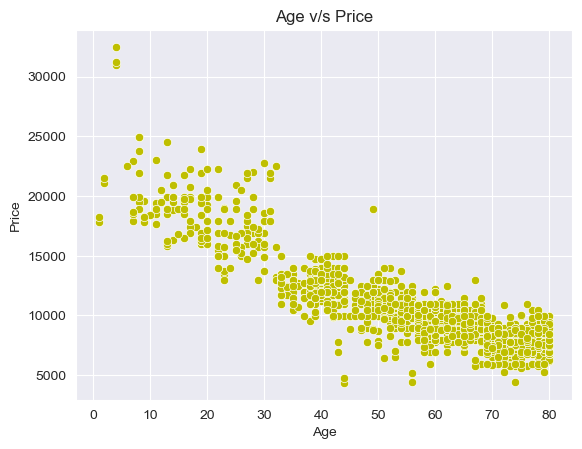

In [10]:
sns.scatterplot(x="Age",y="Price",data=df,color="y")
plt.title("Age v/s Price")

Less aged or little used cars are priced high and conversely more used cars are priced less.

Text(0.5, 1.0, 'Km v/s Price')

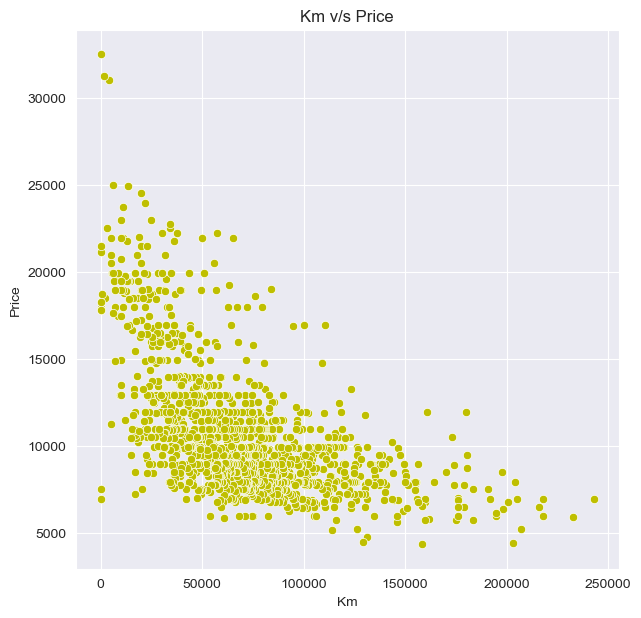

In [11]:
plt.figure(figsize=(7,7))
sns.scatterplot(x="Km",y="Price",data=df,color="y")
plt.title("Km v/s Price")

Less km-driven cars are priced high and conversely, cars which had run more km are priced less.

Text(0.5, 1.0, 'Hp v/s Price')

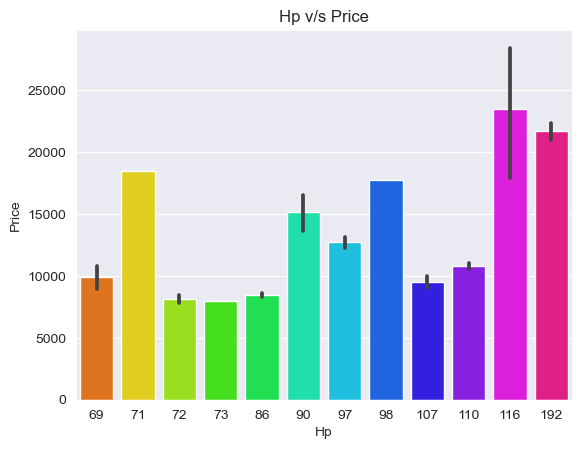

In [12]:
sns.barplot(x="Hp",y="Price",data=df,palette='hsv')
plt.title("Hp v/s Price")

From the above barplot we can remark that Horsepower influences price of car.

Text(0.5, 1.0, 'Cylinder volume (cm3) v/s Price')

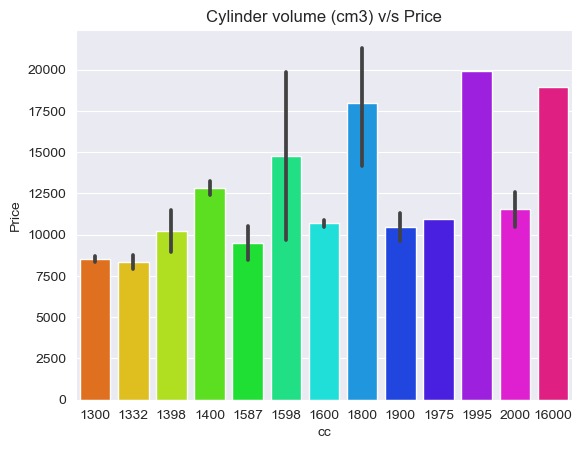

In [13]:
sns.barplot(x="cc",y="Price",data=df,palette='hsv')
plt.title("Cylinder volume (cm3) v/s Price")

From the above barplot we can remark that Cylinder Volume influences price of car.

<AxesSubplot:xlabel='Metallic', ylabel='Price'>

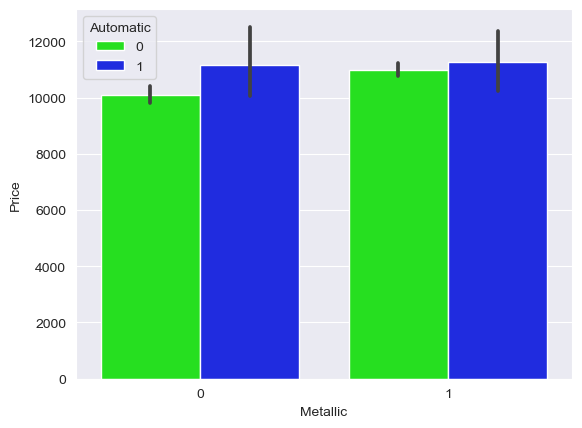

In [14]:
sns.barplot(x="Metallic",y="Price",data=df,palette="hsv",hue="Automatic")

Metallic as well automatic cars are priced high.

Text(0.5, 1.0, 'Doors v/s Price')

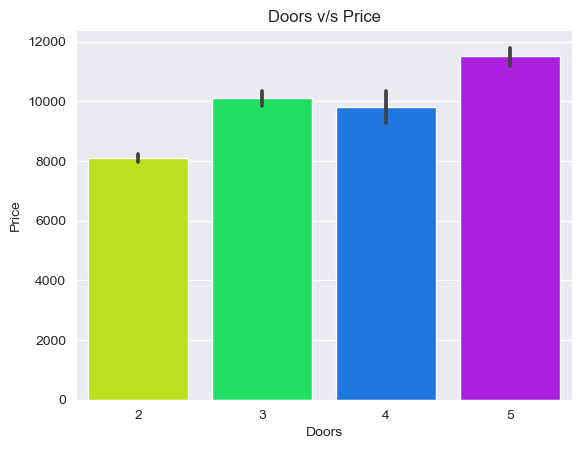

In [15]:
sns.barplot(x="Doors",y="Price",data=df,palette='hsv')
plt.title("Doors v/s Price")

From the above barplot, we can remark that car price is high for more no of doors.

Text(0.5, 1.0, 'Gears v/s Price')

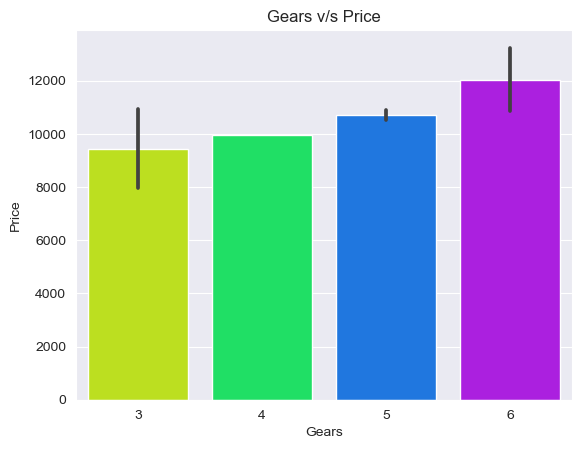

In [16]:
sns.barplot(x="Gears",y="Price",data=df,palette='hsv')
plt.title("Gears v/s Price")

From the above barplot, we can remark that if Number of gear positions are more cars are priced high.

Text(0.5, 1.0, 'Quarterly Road Tax v/s Price')

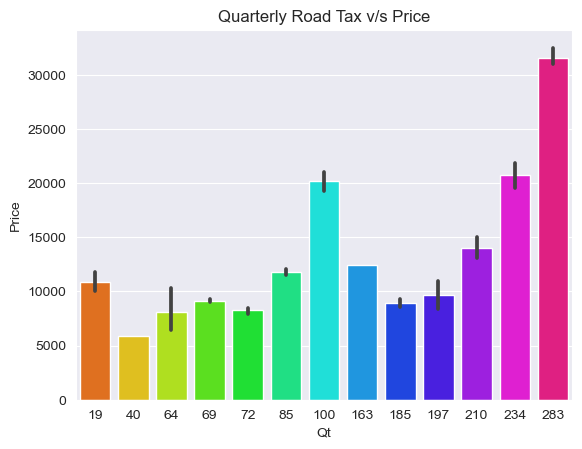

In [17]:
sns.barplot(x="Qt",y="Price",data=df,palette='hsv')
plt.title("Quarterly Road Tax v/s Price")

From the above barplot we can remark that Quarterly Road Tax influences price of car.

Text(0.5, 1.0, '       Weight v/s Price')

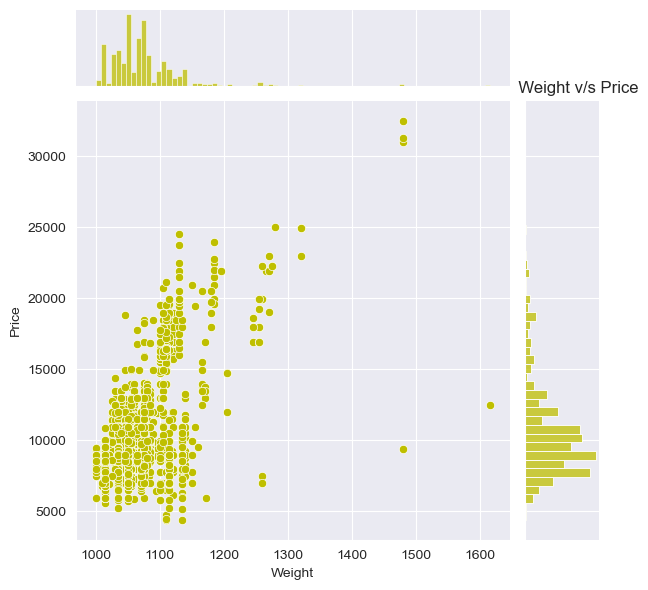

In [18]:
sns.jointplot(x="Weight",y="Price",data=df,color="y")
plt.title("       Weight v/s Price")

From the above jointplot we can observe that low-weight cars are economical.

In [19]:
df.corr()

,Price,Age,Km,Hp,cc,Doors,Gears,Qt,Weight,Metallic,Automatic
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198,0.108905,0.033081
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253,-0.108150,0.031717
Km,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598,-0.080503,-0.081854
Hp,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614,0.058712,0.013144
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637,0.031812,0.066740
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618,0.085243,-0.027654
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613,0.018601,-0.098555
Qt,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134,0.011326,-0.055371
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000,0.057929,0.057249
Metallic,0.108905,-0.108150,-0.080503,0.058712,0.031812,0.085243,0.018601,0.011326,0.057929,1.000000,-0.019335


<AxesSubplot:>

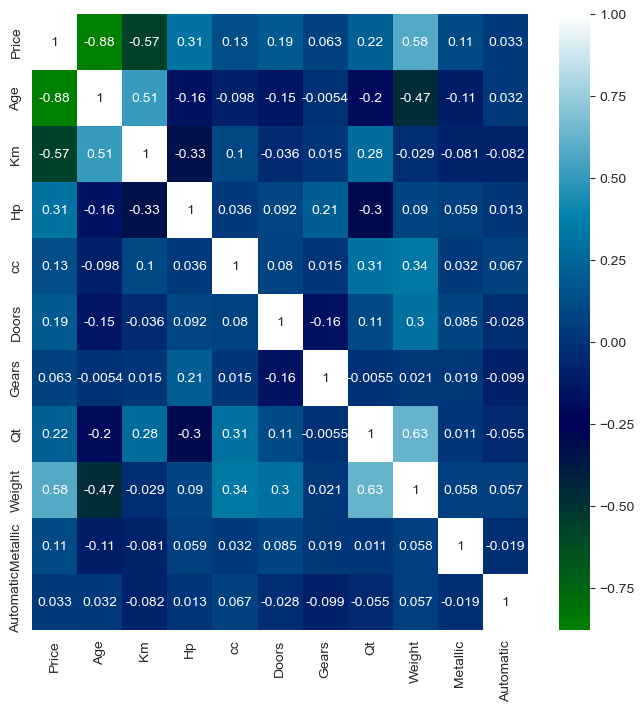

In [20]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='ocean')


#### Building a model --

Lets build the Multiple regression model for predicting price of Toyoto cars--

In [23]:
X=df.iloc[:,1:11]
y=df.iloc[:,0]
def train_test(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)
    print(X_train.shape),print(y_train.shape)
    print(X_test.shape),print(y_test.shape)
    return X_train,X_test,y_train,y_test
print("Calling the train_test function--")
X_train,X_test,y_train,y_test=train_test(X,y)

def modelling(X_train,y_train,X_test):
    modelL=LinearRegression()
    modelL_train=modelL.fit(X_train,y_train)
    print("ModelL training is completed--")
    predL=modelL_train.predict(X_test)
    return predL
print("Calling the modelling function--")
predL=modelling(X_train,y_train,X_test)
print(predL)                         
r2score=(round(r2_score(y_test,predL)*100,2))
rmse = m.sqrt(mean_squared_error(y_test,predL))
print('*************************************************')
print("Multiple Linear Regression--")
print('r2score:',r2score)
print('RMSE:',rmse)
print('************************************************')

print("Lets build the Lasso regression model")
from sklearn.linear_model import Lasso
def modelling1(X_train,y_train,X_test):
    model1=Lasso()
    model1_train=model1.fit(X_train,y_train)
    print("Model1 training is completed--")
    pred1=model1_train.predict(X_test)
    return pred1
print("Calling the modelling1 function--")
pred1=modelling1(X_train,y_train,X_test)
(pred1)
r2score=(round(r2_score(y_test,pred1)*100,2))
rmse = m.sqrt(mean_squared_error(y_test,pred1))

print("Lasso Regression--")
print('r2score:',r2score)
print('RMSE:',rmse)
print('***********************************************')

print("Lets build the Ridge regression model")
from sklearn.linear_model import Ridge
def modelling2(X_train,y_train,X_test):
    model2=Ridge()
    model2_train=model2.fit(X_train,y_train)
    print("Model2 training is completed--")
    pred2=model2_train.predict(X_test)
    return pred2
print("Calling the modelling2 function--")
pred2=modelling2(X_train,y_train,X_test)
(pred2)
r2score=(round(r2_score(y_test,pred2)*100,2))
rmse = m.sqrt(mean_squared_error(y_test,pred2))

print("Ridge Regression--")
print('r2score:',r2score)
print('RMSE:',rmse)
print('***********************************************')

Calling the train_test function--
(1148, 10)
(1148,)
(288, 10)
(288,)
Calling the modelling function--
ModelL training is completed--
[ 9474.44905758 11936.21630783 17462.10240403 26123.92959891
  5530.7474189  12592.72332666  7841.56667271 13370.1648505
 13167.03792691  7731.55707939 10163.18915175  8168.91685301
  6329.04464516  7092.74599761  8850.72836097  7395.31430383
  7719.04394694  6701.6575507  13105.99549578 11413.63807581
  8589.49413553  7389.77458899 20548.73109099  8250.85400305
 13022.53447033 12404.96155525  9007.72162219 10197.42376216
 13198.24029611  6678.27056748  9167.48408377  9769.51234632
  8018.94005677  9945.16298738  4819.11970223 11014.81128183
  9330.30626941  8340.00269243  8197.58183689  6749.40444909
 17332.54743138 15705.04630355 10583.50753622  7827.93986473
  7325.19970312  7199.09769686  9229.90788965 15950.27067113
 10647.68787678  9562.04116561  9566.7993535   7589.19055809
 12262.19972954  6976.3059377   7914.19311397 10210.63239709
  5220.412547

We can use any of this model to predict price of Toyota as r2_scores are nearly equal.